# World Happiness Report

## Load libraries

In [142]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

## Load Dataset

In [317]:
df_2015 = pd.read_csv(r'2015.csv')

## Summarize Data

In [144]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [145]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [146]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Dataset Visualization

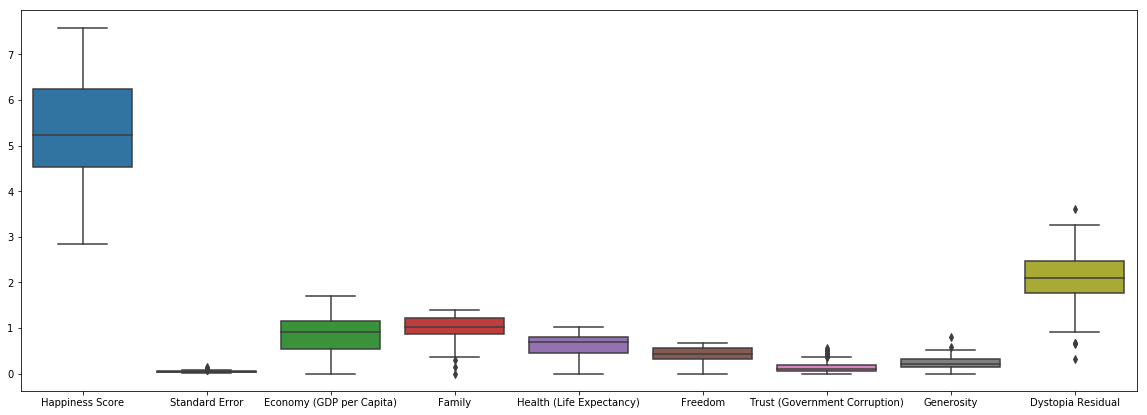

In [147]:
df_2015_box = df_2015.drop(['Happiness Rank'], axis=1)
plt.figure(figsize=(20,7))
sns.boxplot(data=df_2015_box)

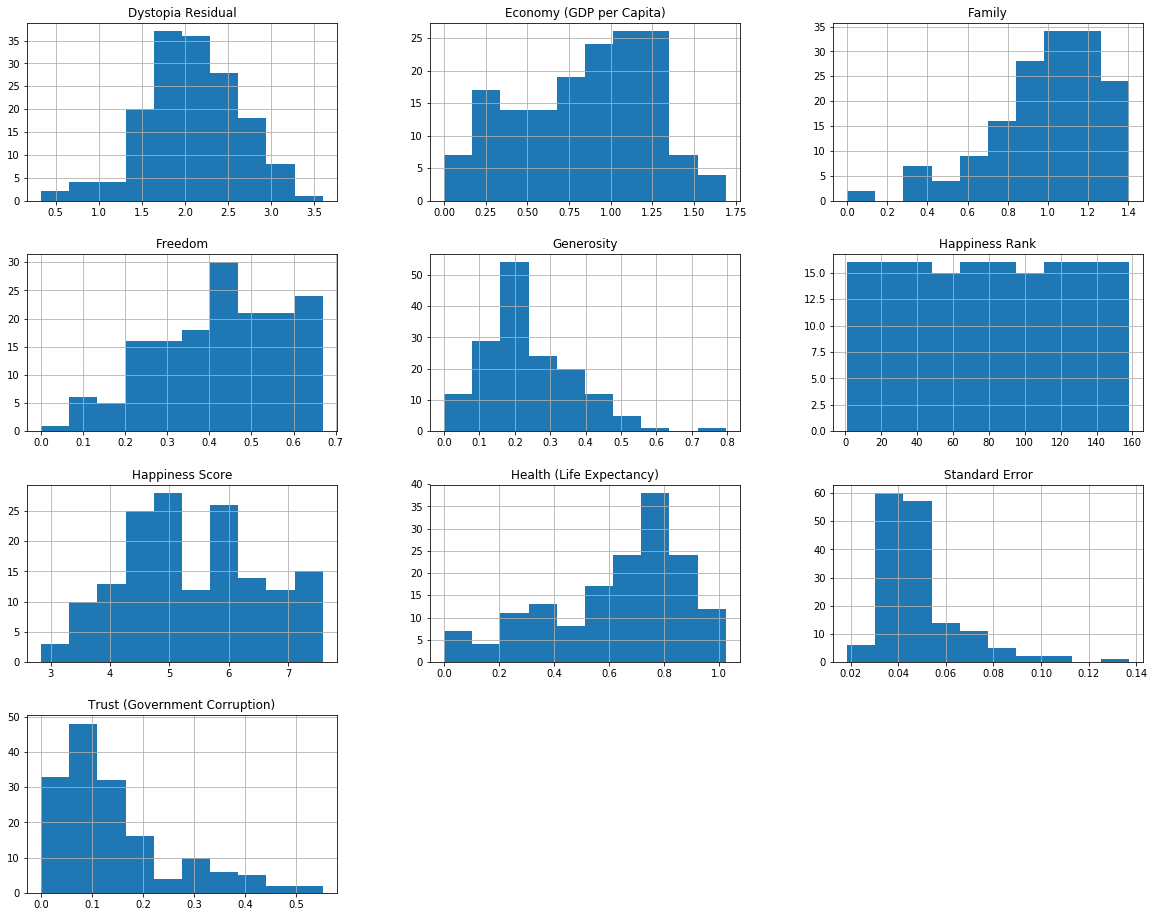

In [148]:
df_2015.hist(figsize = (20,16))
plt.show()

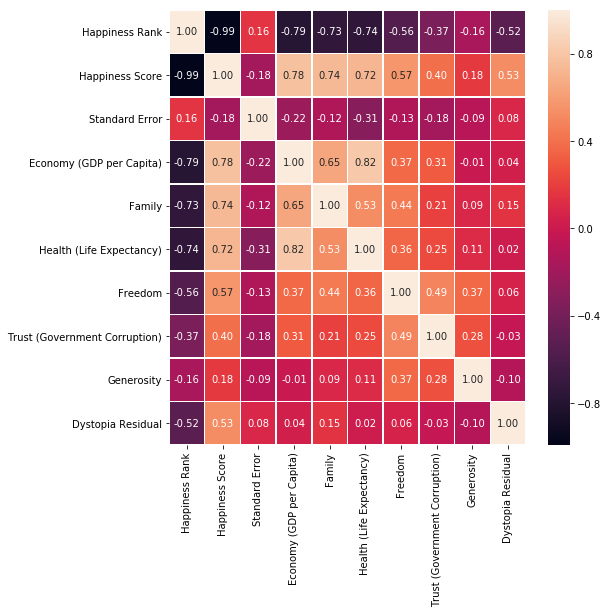

In [175]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_2015.corr(),annot=True,linewidths=.5,fmt=".2f",ax=ax)
plt.show()

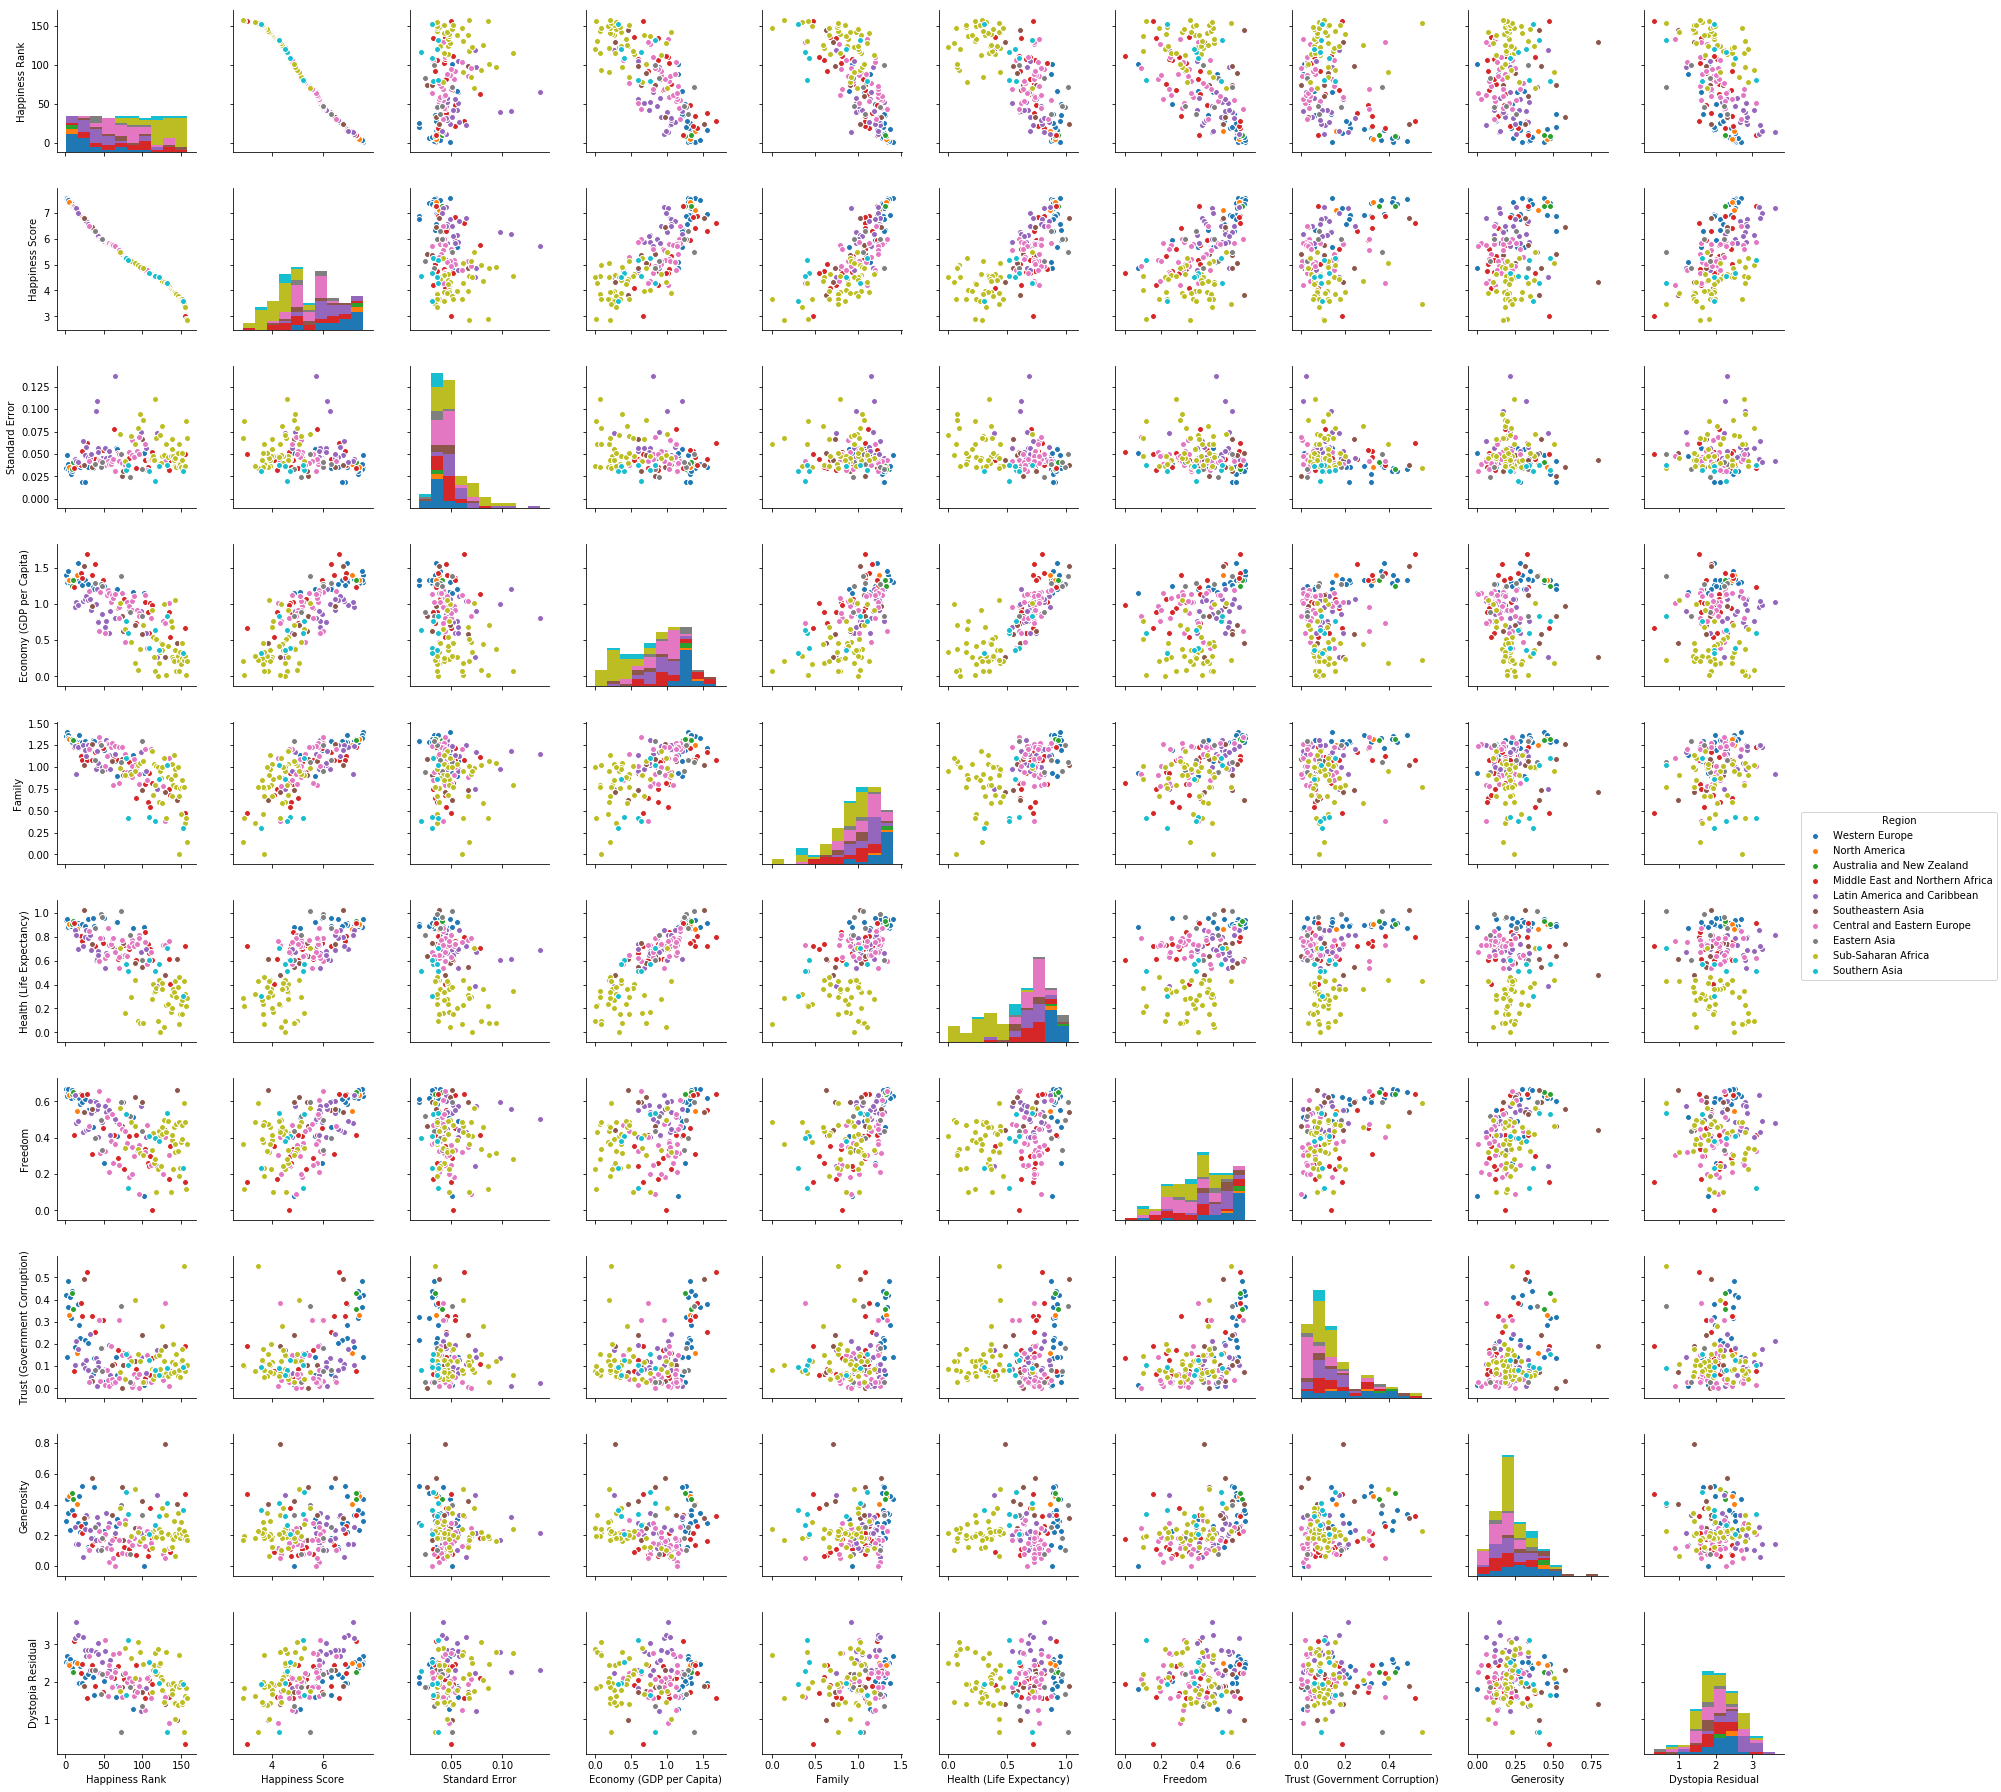

In [151]:
sns.pairplot(df_2015, hue='Region')

In [152]:
df_2015.groupby(['Region']).size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

## Data preparation

In [318]:
df_2015=df_2015.drop(['Country','Happiness Rank','Happiness Score'], axis=1)

In [213]:
df_2015.dropna()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Western Europe,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Western Europe,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Western Europe,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,Australia and New Zealand,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia and New Zealand,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [326]:
#retirar classes com 2
df_2015=df_2015[(df_2015.Region != 'Australia and New Zealand') & (df_2015.Region != 'North America')]

## Algorithm evaluation

In [327]:
X_2015 = df_2015.drop(['Region'], axis=1)
X_2015.shape

(154, 8)

In [328]:
y_2015 = df_2015['Region']
y_2015.shape

(154,)

In [329]:
validation_size =0.2
seed = 7
Xtrain, Xtest, ytrain, ytest = train_test_split(X_2015, y_2015, random_state=seed, test_size=validation_size)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(123, 8)
(123,)
(31, 8)
(31,)


In [290]:
num_folds=10
scoring='accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [291]:
results = []
names = []
kfold = KFold(n_splits=num_folds, random_state=seed)
for name, model in models:
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.496795 (0.121702)
LDA: 0.602564 (0.105448)
KNN: 0.528846 (0.117406)


C:\Users\kuser\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


CART: 0.586538 (0.100551)
NB: 0.593590 (0.120308)
SVM: 0.457051 (0.126951)


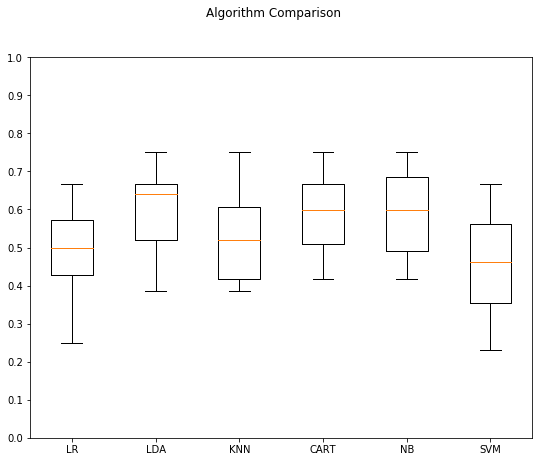

In [292]:
fig = plt.figure(figsize=(9,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

### Standardize Data

In [293]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.594231 (0.137874)
ScaledLDA: 0.602564 (0.105448)


C:\Users\kuser\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


ScaledKNN: 0.617308 (0.125191)
ScaledCART: 0.610256 (0.106217)
ScaledNB: 0.593590 (0.120308)
ScaledSVM: 0.626282 (0.126724)


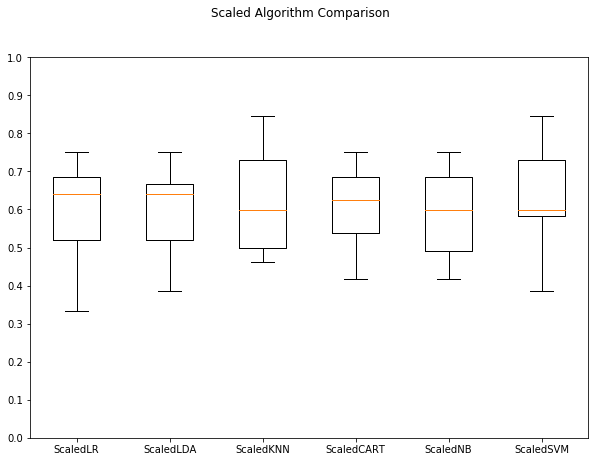

In [294]:
fig1 = plt.figure(figsize=(10,7))
fig1.suptitle('Scaled Algorithm Comparison')
ax = fig1.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

## Algorithm Tuning

In [331]:
scaler = StandardScaler().fit(Xtrain)
rescaledX = scaler.transform(Xtrain)

### LDA

In [296]:
lda = LinearDiscriminantAnalysis()
grid_param = {  
    'n_components': [1,2,3,4,5,6,7,8,9],
    'solver': ['svd', 'lsqr', 'eigen']
}
grid = GridSearchCV(estimator=lda,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.601626 using {'n_components': 1, 'solver': 'svd'}
0.601626 (0.106303) with: {'n_components': 1, 'solver': 'svd'}
0.601626 (0.106303) with: {'n_components': 1, 'solver': 'lsqr'}
0.601626 (0.143265) with: {'n_components': 1, 'solver': 'eigen'}
0.601626 (0.106303) with: {'n_components': 2, 'solver': 'svd'}
0.601626 (0.106303) with: {'n_components': 2, 'solver': 'lsqr'}
0.601626 (0.143265) with: {'n_components': 2, 'solver': 'eigen'}
0.601626 (0.106303) with: {'n_components': 3, 'solver': 'svd'}
0.601626 (0.106303) with: {'n_components': 3, 'solver': 'lsqr'}
0.601626 (0.143265) with: {'n_components': 3, 'solver': 'eigen'}
0.601626 (0.106303) with: {'n_components': 4, 'solver': 'svd'}
0.601626 (0.106303) with: {'n_components': 4, 'solver': 'lsqr'}
0.601626 (0.143265) with: {'n_components': 4, 'solver': 'eigen'}
0.601626 (0.106303) with: {'n_components': 5, 'solver': 'svd'}
0.601626 (0.106303) with: {'n_components': 5, 'solver': 'lsqr'}
0.601626 (0.143265) with: {'n_components': 5, '

C:\Users\kuser\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


### KNN

In [332]:
knn = KNeighborsClassifier()
grid_param = {  
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']
}
grid = GridSearchCV(estimator=knn,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.674797 using {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
0.609756 (0.117487) with: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}
0.609756 (0.117487) with: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'distance'}
0.626016 (0.144255) with: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
0.674797 (0.136350) with: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
0.609756 (0.135799) with: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
0.642276 (0.130462) with: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
0.585366 (0.132952) with: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
0.617886 (0.133572) with: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}
0.593496 (0.093367) with: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
0.609756 (0.115473) with: {'algorithm': 'ball_tree', 'n_neighbors': 9,

### SVM

In [298]:
svm = SVC()
grid_param = {  
    'C': [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid = GridSearchCV(estimator=svm,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.650407 using {'C': 1.7, 'kernel': 'rbf'}
0.601626 (0.145967) with: {'C': 0.1, 'kernel': 'linear'}
0.268293 (0.142900) with: {'C': 0.1, 'kernel': 'poly'}
0.252033 (0.149031) with: {'C': 0.1, 'kernel': 'rbf'}
0.455285 (0.106255) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.642276 (0.113592) with: {'C': 0.3, 'kernel': 'linear'}
0.471545 (0.122824) with: {'C': 0.3, 'kernel': 'poly'}
0.536585 (0.116700) with: {'C': 0.3, 'kernel': 'rbf'}
0.560976 (0.118107) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.617886 (0.142811) with: {'C': 0.5, 'kernel': 'linear'}
0.487805 (0.125486) with: {'C': 0.5, 'kernel': 'poly'}
0.601626 (0.124167) with: {'C': 0.5, 'kernel': 'rbf'}
0.577236 (0.130851) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.609756 (0.141807) with: {'C': 0.7, 'kernel': 'linear'}
0.512195 (0.090785) with: {'C': 0.7, 'kernel': 'poly'}
0.609756 (0.122269) with: {'C': 0.7, 'kernel': 'rbf'}
0.585366 (0.149555) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.617886 (0.138363) with: {'C': 0.9, 'kernel': 'linear'

### LR

In [299]:
lr = LogisticRegression()
grid_param = {  
    'C': [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid = GridSearchCV(estimator=lr,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.642276 using {'C': 1.3, 'solver': 'newton-cg'}
0.569106 (0.118483) with: {'C': 0.1, 'solver': 'newton-cg'}
0.569106 (0.118483) with: {'C': 0.1, 'solver': 'lbfgs'}
0.569106 (0.135897) with: {'C': 0.1, 'solver': 'liblinear'}
0.569106 (0.118483) with: {'C': 0.1, 'solver': 'sag'}
0.569106 (0.118483) with: {'C': 0.1, 'solver': 'saga'}
0.609756 (0.144897) with: {'C': 0.3, 'solver': 'newton-cg'}
0.609756 (0.144897) with: {'C': 0.3, 'solver': 'lbfgs'}
0.593496 (0.127161) with: {'C': 0.3, 'solver': 'liblinear'}
0.609756 (0.144897) with: {'C': 0.3, 'solver': 'sag'}
0.609756 (0.144897) with: {'C': 0.3, 'solver': 'saga'}
0.617886 (0.136276) with: {'C': 0.5, 'solver': 'newton-cg'}
0.617886 (0.136276) with: {'C': 0.5, 'solver': 'lbfgs'}
0.593496 (0.125303) with: {'C': 0.5, 'solver': 'liblinear'}
0.617886 (0.136276) with: {'C': 0.5, 'solver': 'sag'}
0.617886 (0.136276) with: {'C': 0.5, 'solver': 'saga'}
0.626016 (0.126137) with: {'C': 0.7, 'solver': 'newton-cg'}
0.626016 (0.126137) with: {'C'

### CART

In [300]:
cart = DecisionTreeClassifier()
grid_param = {  
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
grid = GridSearchCV(estimator=cart,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.617886 using {'criterion': 'gini', 'splitter': 'best'}
0.617886 (0.091698) with: {'criterion': 'gini', 'splitter': 'best'}
0.560976 (0.152400) with: {'criterion': 'gini', 'splitter': 'random'}
0.577236 (0.133999) with: {'criterion': 'entropy', 'splitter': 'best'}
0.512195 (0.139452) with: {'criterion': 'entropy', 'splitter': 'random'}


## Emsembles

In [303]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

AB: 0.278205 (0.109584)
GBM: 0.594872 (0.088906)
RF: 0.650641 (0.096761)
ET: 0.617949 (0.107157)


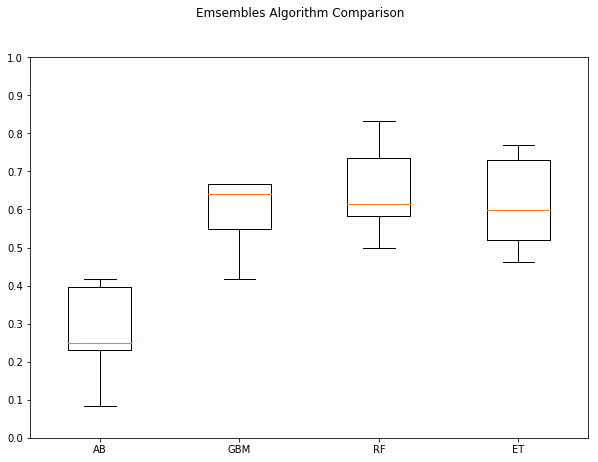

In [304]:
fig2 = plt.figure(figsize=(10,7))
fig2.suptitle('Emsembles Algorithm Comparison')
ax = fig2.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

### Random Forest

In [333]:
rf = RandomForestClassifier()
grid_param = {  
    'n_estimators': [10, 50, 100,300,500,700,1000,1500,2000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
grid = GridSearchCV(estimator=rf,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(Xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.707317 using {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 300}
0.626016 (0.064688) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 10}
0.674797 (0.073526) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}
0.682927 (0.053503) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
0.691057 (0.043065) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}
0.666667 (0.059531) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 500}
0.674797 (0.057178) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 700}
0.682927 (0.053503) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1000}
0.691057 (0.056653) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1500}
0.682927 (0.053503) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 2000}
0.560976 (0.144140) with: {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 10}
0.682927 (0.071439) with: {'bo

### Gradient Boosting

In [313]:
gbm = GradientBoostingClassifier()
grid_param = {  
    'n_estimators': [10,50,100,300,500,700,1000,1500,2000],
    'criterion': ['friedman_mse', 'mse', 'mae']
}
grid = GridSearchCV(estimator=gbm,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(Xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.617886 using {'criterion': 'friedman_mse', 'n_estimators': 300}
0.601626 (0.091267) with: {'criterion': 'friedman_mse', 'n_estimators': 10}
0.601626 (0.125212) with: {'criterion': 'friedman_mse', 'n_estimators': 50}
0.601626 (0.086879) with: {'criterion': 'friedman_mse', 'n_estimators': 100}
0.617886 (0.076175) with: {'criterion': 'friedman_mse', 'n_estimators': 300}
0.601626 (0.086879) with: {'criterion': 'friedman_mse', 'n_estimators': 500}
0.617886 (0.076175) with: {'criterion': 'friedman_mse', 'n_estimators': 700}
0.601626 (0.069555) with: {'criterion': 'friedman_mse', 'n_estimators': 1000}
0.609756 (0.091274) with: {'criterion': 'friedman_mse', 'n_estimators': 1500}
0.601626 (0.086879) with: {'criterion': 'friedman_mse', 'n_estimators': 2000}
0.585366 (0.077137) with: {'criterion': 'mse', 'n_estimators': 10}
0.593496 (0.121073) with: {'criterion': 'mse', 'n_estimators': 50}
0.585366 (0.085470) with: {'criterion': 'mse', 'n_estimators': 100}
0.601626 (0.093801) with: {'crit

### Extra Trees

In [316]:
et = ExtraTreesClassifier()
grid_param = {  
    'n_estimators': [10,50,100,300,500,700,1000,1500,2000],
    'criterion': ['gini', 'entropy'],
    'bootstrap' : [True, False]
}
grid = GridSearchCV(estimator=et,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(Xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.699187 using {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 50}
0.626016 (0.077178) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 10}
0.642276 (0.110805) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}
0.658537 (0.119439) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
0.642276 (0.127431) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}
0.666667 (0.107320) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 500}
0.658537 (0.124146) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 700}
0.650407 (0.120568) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1000}
0.650407 (0.120568) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1500}
0.666667 (0.107320) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 2000}
0.528455 (0.161500) with: {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 10}
0.585366 (0.125283) with: {'boo

### AdaBoost

In [311]:
ab = AdaBoostClassifier()
grid_param = {  
    'n_estimators': [10,50,100,300,500,700,1000,1500,2000],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid = GridSearchCV(estimator=ab,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(Xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.593496 using {'algorithm': 'SAMME', 'n_estimators': 300}
0.528455 (0.170601) with: {'algorithm': 'SAMME', 'n_estimators': 10}
0.560976 (0.134799) with: {'algorithm': 'SAMME', 'n_estimators': 50}
0.585366 (0.111177) with: {'algorithm': 'SAMME', 'n_estimators': 100}
0.593496 (0.125718) with: {'algorithm': 'SAMME', 'n_estimators': 300}
0.552846 (0.116944) with: {'algorithm': 'SAMME', 'n_estimators': 500}
0.577236 (0.106231) with: {'algorithm': 'SAMME', 'n_estimators': 700}
0.569106 (0.114683) with: {'algorithm': 'SAMME', 'n_estimators': 1000}
0.577236 (0.090610) with: {'algorithm': 'SAMME', 'n_estimators': 1500}
0.544715 (0.121151) with: {'algorithm': 'SAMME', 'n_estimators': 2000}
0.276423 (0.108972) with: {'algorithm': 'SAMME.R', 'n_estimators': 10}
0.276423 (0.108972) with: {'algorithm': 'SAMME.R', 'n_estimators': 50}
0.276423 (0.108972) with: {'algorithm': 'SAMME.R', 'n_estimators': 100}
0.276423 (0.108972) with: {'algorithm': 'SAMME.R', 'n_estimators': 300}
0.276423 (0.108972